In [ ]:
%tensorflow_version 1.x
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

TensorFlow 1.x selected.
Mounted at /content/drive


Pclass


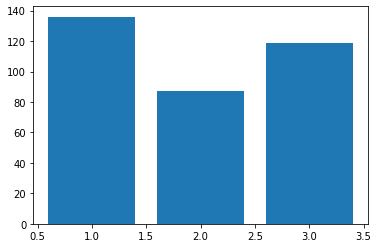

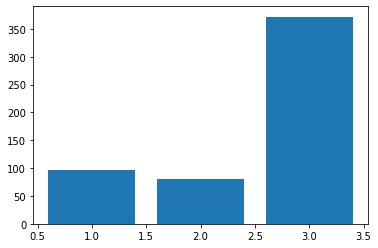


Sex


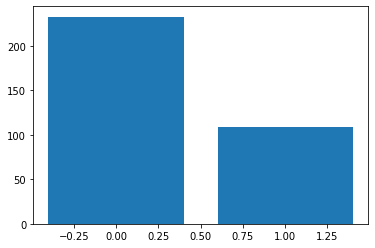

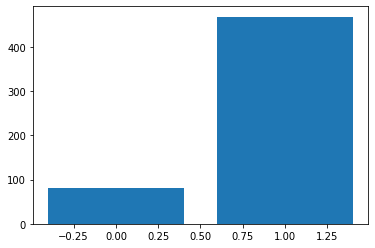


Age


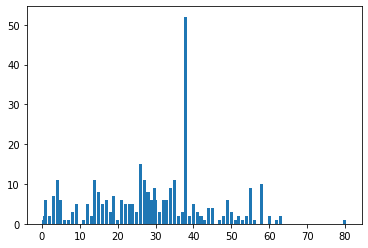

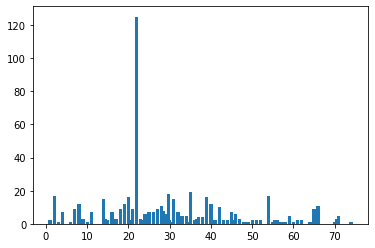


SibSp


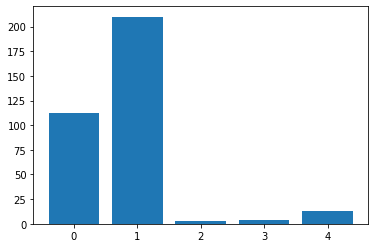

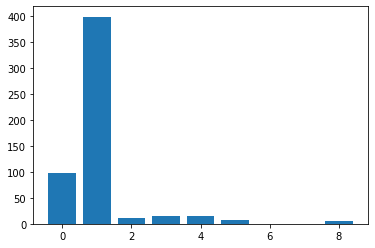


Parch


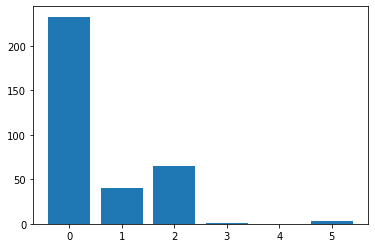

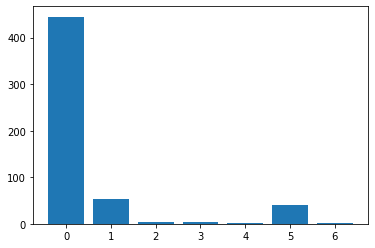


Cabin


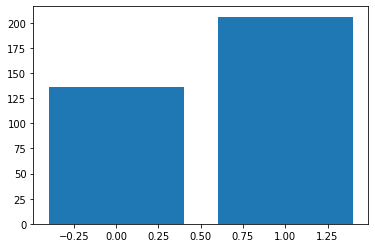

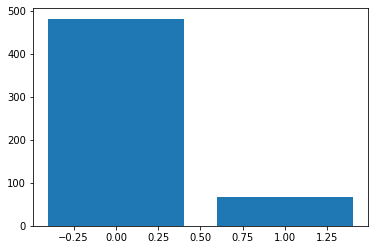


Embarked


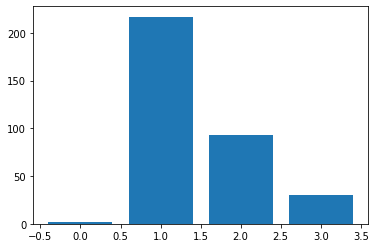

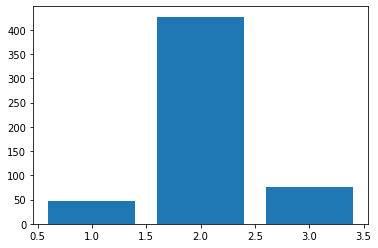


(891, 7)
(891,)
(801, 7) (90, 7) (801,) (90,)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               640       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/kaggel/train.csv')#讀檔
row_name=list(data.columns)#讀資料種類
#刪掉無用資料
delet_col = [row_name[0],row_name[3],row_name[8],row_name[9]]
data_new = data.drop(delet_col, axis=1)
#將男女以1和0表示
data_new = data_new.replace(['male', 'female'],[1, 0])
data_new[row_name[11]]=data_new[row_name[11]].fillna(0)
data_new[row_name[11]]= data_new[row_name[11]].replace(['C','S','Q'],[1 ,2 ,3])
#將歲數為na的以平均值表示
data_new['Age'] = data_new['Age'].fillna(value=data_new['Age'].mean())
#將cabin中的數值以0或1表示
strlist = list(data_new['Cabin'].unique())
data_new['Cabin']=data_new['Cabin'].fillna(0)
for element in strlist:
    data_new['Cabin']=data_new['Cabin'].replace(element,1)
    

num = data_new[row_name[1]].value_counts()#統計生和死個數
#分為生和死的資料
data_live = data_new[data_new[row_name[1]]==1]
data_die = data_new[data_new[row_name[1]]==0]
#分析哪些會影響結果的因素
row_name2=list(data_live.columns)
for i in range(1,8):
    print(row_name2[i])
    plt.bar(data_live[row_name2[i]].unique(), data_live[row_name2[i]].value_counts())
    plt.show()
    plt.bar(data_die[row_name2[i]].unique(), data_die[row_name2[i]].value_counts())
    plt.show()
    print()


anwser = data_new[row_name[1]]
delet_col = [row_name[1]]
data_new = data_new.drop(delet_col, axis=1)
print(data_new.shape)
print(anwser.shape)
X_train, X_test, y_train, y_test = train_test_split(data_new, anwser,test_size=0.1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, Activation,BatchNormalization
from keras import optimizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
def create_dlp(dim, regress=False):
  model = Sequential()
  model.add(Dense(128, input_dim=dim, activation="relu"))
  model.add(Dense(256, activation="relu"))
  model.add(Dense(256, activation="relu"))
  model.add(Dense(256, activation="relu"))
  if regress:
    model.add(Dense(1, activation="sigmoid"))

  return model
model = create_dlp(4,regress=True)
model.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.001), metrics=['accuracy'])
model.summary()


In [ ]:
#earlystop = EarlyStopping(monitor='accuracy', patience=100,verbose=2)
rle = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=20,verbose=1,min_lr=1e-10)
history = model.fit(X_train, y_train,validation_data=(X_test, y_test),
          epochs=10000, batch_size=32,verbose=2,callbacks = [rle])

串流輸出內容已截斷至最後 5000 行。
Epoch 7620/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accuracy: 0.8333
Epoch 7621/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accuracy: 0.8333
Epoch 7622/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accuracy: 0.8333
Epoch 7623/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accuracy: 0.8333
Epoch 7624/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accuracy: 0.8333
Epoch 7625/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accuracy: 0.8333
Epoch 7626/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accuracy: 0.8333
Epoch 7627/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accuracy: 0.8333
Epoch 7628/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accuracy: 0.8333
Epoch 7629/10000
 - 0s - loss: 0.1269 - accuracy: 0.8090 - val_loss: 0.1336 - val_accura

Text(0.5, 1.0, 'acc')

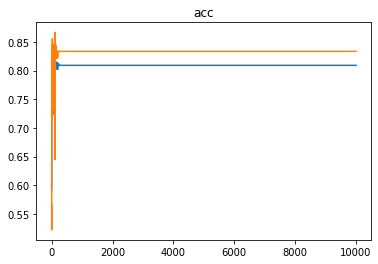

In [ ]:
logs = history.history
plt.plot(logs['accuracy'])
plt.plot(logs['val_accuracy'])
plt.title('acc')

Text(0.5, 1.0, 'loss')

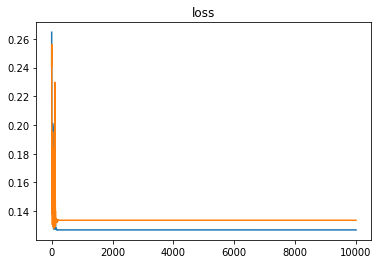

In [ ]:
plt.plot(logs['loss'])
plt.plot(logs['val_loss'])
plt.title('loss')

In [ ]:
testdata = pd.read_csv('/content/drive/MyDrive/kaggel/test.csv')
ansdata = testdata[row_name[0]]
delet_col = [row_name[0],row_name[3],row_name[6],row_name[7],row_name[8],row_name[9],row_name[11]]
testdata = testdata.drop(delet_col, axis=1)
testdata = testdata.replace(['male', 'female'],[1, 0])
testdata['Age'] = testdata['Age'].fillna(value=data_new['Age'].mean())
strlist2 = list(testdata['Cabin'].unique())
testdata['Cabin']=testdata['Cabin'].fillna(0)
for element in strlist2:
    testdata['Cabin']=testdata['Cabin'].replace(element,1)

predictions = model.predict(testdata)
print(predictions.round())

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.

In [ ]:
#print(predictions.type)

predictions =predictions.round()
predictions = pd.DataFrame(predictions,columns=['Survived'])
predictions[row_name[0]] = ansdata
predictions =predictions[['PassengerId','Survived']]
print(predictions)


predictions.to_csv('/content/drive/MyDrive/kaggel/ans.csv')

     PassengerId  Survived
0            892       0.0
1            893       1.0
2            894       0.0
3            895       0.0
4            896       0.0
..           ...       ...
413         1305       0.0
414         1306       1.0
415         1307       0.0
416         1308       0.0
417         1309       0.0

[418 rows x 2 columns]
